Assignment #2
Question 3 - Vortex interaction: numerical exercise 

@author: Alexandra Rochon
@collab: Olivia Locke (consulted)
14/02/24

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import imageio
import os

In [3]:
## Setting up initial conditions (vortex centres and circulation)
# iteration params
dt = 1
Nsteps = 20
# Vortex rings position
x_v = np.array([-20,-70,-20,-70])
y_v = np.array([-40,-40,60,60])
k_v = np.array([75,75,-75,-75])

<function matplotlib.pyplot.show(*args, **kw)>

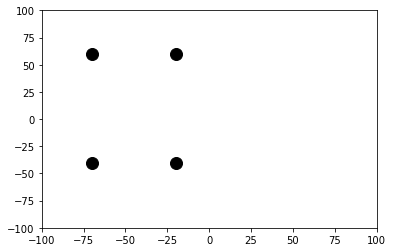

In [4]:
# Setting up the plot of initial position
plt.ion( )
fig, ax = plt.subplots(1,1)

# mark the initial positions of vortices
p, = ax.plot(x_v, y_v, 'ko', markersize=12)
ax.set_xlim(-100,100)
ax.set_ylim(-100,100)
plt.show

In [5]:
# draw the initial velocity streamline
ngrid = 100
Y, X = np.mgrid[-ngrid:ngrid:360j, -ngrid:ngrid:360j] 
vel_x = np.zeros(np.shape(Y)) #this holds x-velocity
vel_y = np.zeros(np.shape(Y)) #this holds y-velocity

In [6]:
# Initial velocity field


for i in range(len(x_v)): # looping over each vortex

    # u = k/r in cartesian coordinates
    # calculate X-X0 and Y-Y0
    dist = ((X - x_v[i])**2 + (Y - y_v[i])**2) # distance of each point on the grid from vortex
    
    # compute the velocity
    # find velocity at all points X Y from each vortex (streamline) and add up
    vel_x += (Y - y_v[i])*(-k_v[i] / dist)
    vel_y += (X - x_v[i])*(k_v[i] / dist)

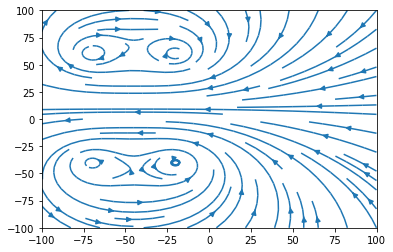

In [7]:
# plot initial streamlines

fig = plt.figure() 
plt.xlim([-ngrid, ngrid]) # set up the boundaries of the simulation box
plt.ylim([-ngrid, ngrid])

plt.streamplot(X, Y, vel_x, vel_y, density=[0.8, 0.8])

fig.canvas.draw()

In [8]:
# Function to create a plot
def create_plot(X,Y,x_v,y_v,vel_x,vel_y, title):
    fig = plt.figure()
    p, = plt.plot(x_v, y_v, 'ko', markersize=12)
    plt.title(title)
    plt.xlabel('X-position')
    plt.ylabel('Y-position')
    plt.xlim([-ngrid, ngrid])
    plt.ylim([-ngrid, ngrid])
    plt.streamplot(X, Y, vel_x, vel_y, density=[0.7, 0.7])
    fig.canvas.draw()

In [9]:
# Evolution of the vortex position and interaction
x_dif = np.zeros(4)
y_dif = np.zeros(4)

# same as above (for easy edit purposes) and resets for a new run
x_v = np.array([-20,-70,-20,-70])
y_v = np.array([-40,-40,60,60])
k_v = np.array([75,75,-75,-75])

# initialize array to calculate for each iteration and each vortex
x_v_new = np.zeros(np.shape(y_v))
y_v_new = np.zeros(np.shape(y_v))

vel_x = np.zeros(np.shape(Y)) #this holds x-velocity
vel_y = np.zeros(np.shape(Y)) #this holds y-velocity

Nsteps = 75 

# Create GIF
# the code to generate the gif is from ChatGPT 
with imageio.get_writer('plots.gif', mode='I', duration=0.1) as writer:
    for j in range(Nsteps):
        # Loop through each vortex to compute the total advection velocity on it
        # due to each of the other vortices
        for i in range(len(x_v)): 
                
            # Compute the differences in x and y coordinates between the current vortex 
            # and all other vortices
            x_dif =  x_v - x_v[i]
            y_dif =  y_v - y_v[i]

            # Calculate the squared differences in x and y coordinates
            x_sum = np.square(x_dif)
            y_sum = np.square(y_dif)

            # Compute the distance between the vortices using the squared differences
            distance = np.add(x_sum, y_sum)

            # Compute the x and y components of the velocity due to each other vortex 
            # (xx and yy)
            # Avoid division by zero by setting a default value of zero where distance 
            # is zero
            xx = np.divide(-k_v, distance,out=np.zeros(distance.shape, dtype=float), where=distance!=0)
            yy = np.divide(k_v, distance,out=np.zeros(distance.shape, dtype=float), where=distance!=0)

            # Compute the total advection velocity on the current vortex and sum the 
            # contributions from all other vortices
            advel_x = np.sum(np.multiply(y_dif,xx,where=xx!=0))
            advel_y = np.sum(np.multiply(x_dif,yy,where=yy!=0))
        
            # Update the position of the current vortex using the advection velocity 
            # and the time step (dt)
            x_v_new[i] = x_v[i] + advel_x*dt
            y_v_new[i] = y_v[i] + advel_y*dt
        
        # Update the positions of all vortices to their new positions
        x_v = x_v_new
        y_v = y_v_new
    
        # reinitialize vel field
        vel_x = np.zeros(np.shape(Y)) 
        vel_y = np.zeros(np.shape(Y)) 
    
        for i in range(len(x_v)): # looping over each vortex

            # u = k/r in cartesian coordinates
            # calculate X-X0 and Y-Y0            
            dist = ((X - x_v[i])**2 + (Y - y_v[i])**2) # distance of each point on the grid from vortex
            
            # compute the velocity
            # find velocity at all points X Y from each vortex (streamline) and add up
            vel_x += (Y - y_v[i])*(-k_v[i] / dist)
            vel_y += (X - x_v[i])*(k_v[i] / dist)

        title = f'Plot {j+1}'
        create_plot(X,Y,x_v,y_v,vel_x,vel_y, title)
        
        # Capture the current plot as an image and add it to the GIF
        plt.savefig('temp_plot.png')
        writer.append_data(imageio.imread('temp_plot.png'))
            
        plt.close()

# Remove the temporary plot image
os.remove('temp_plot.png')
